# Homework 5 (100 points) CNNs, AEs, GANs

## Task 1 (70 points): CNNs

### Part 1 (20 points): Custom CNN
This step involves downloading, preparing, and visualizing your
dataset. Create a convolutional base using a common pattern: a stack of Conv and
MaxPooling layers. Depending on the problem and the dataset you must decide what
pattern you want to use (i.e., how many Conv layers and how many pooling layers).
Please describe why you chose a particular pattern. Add the final dense layer(s).
Compile and train the model. Report the final evaluation and describe the metrics

#### Dataset & Preparation

For this task I have selected the PlantVillage, plant leaf diseases dataset available [here](https://data.mendeley.com/datasets/tywbtsjrjv/1) and [here](https://paperswithcode.com/dataset/plantvillage). The dataset contains images of different types of plants with and without 

In [14]:
import os

import torch
import torch.utils.data
import torchvision.io

class PlantVillageDataset(torch.utils.data.Dataset):
    def __init__(self):
        base_path = "data/PlantVillageDataset"
        self.images = [] #list of all image classes with their paths in a tuple (class_ohe, image path)
        self.image_classes = os.listdir(base_path)
        for i, image_class in enumerate(self.image_classes):
            image_class_ohe = torch.tensor([1 if j == i else 0 for j in range(len(self.image_classes))]) #one hot encoding for the class label
            image_names = os.listdir(f"{base_path}/{image_class}")
            for image_name in image_names:
                self.images.append((image_class_ohe, f"{base_path}/{image_class}/{image_name}"))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        return torchvision.io.read_image(self.images[index][1])/255, self.images[index][0]

In [16]:
dataset = PlantVillageDataset()
print(dataset[0][0].shape)
print(dataset[0][1].shape)

torch.Size([3, 256, 256])
torch.Size([39])


We see that each image is composed of 3 color planes with a width and height of 256 with 39 classes, next we inspect the class distribution of the dataset. Due to the relitively even distribution of the classes we will use classification accuracy as our metric.

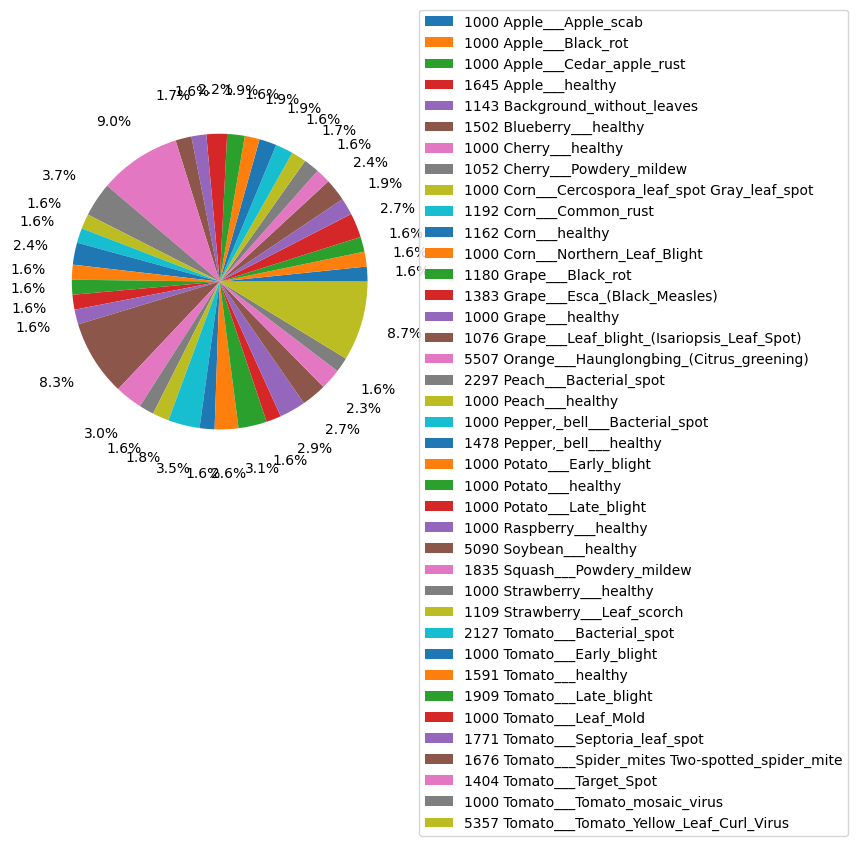

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class_indexes = [np.argmax(x[0]) for x in dataset.images]
class_counts = np.unique(class_indexes, return_counts=True)


plt.pie(x=class_counts[1], autopct='%1.1f%%', pctdistance=1.3);
plt.legend(labels=[str(class_counts[1][i]) + " " + dataset.image_classes[i] for i in range(len(class_counts[1]))], loc=(1.04, -1))